# Xarray Advanced Plotting

`Xarray` has built-in plotting functionality that allows you to quickly look at your data by saying calling `.plot( )` method. 

For many purposes you may want to manipulate how your plots are displayed. This notebook covers many examples of different plotting techniques. This is not an exhaustive list!

In [1]:
#Import necessary modules
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline 

## 1D Data

In [2]:
# Load Data
airtemps = xr.open_dataset('data/air_temperature.nc')
airtemps

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

- **Convert temperature to Celcius:**

In [3]:
air = airtemps.air - 273.15
air.attrs = airtemps.air.attrs
air.attrs['units'] = 'deg C'

- **Select one-dimenstion of data:**

/Users/abanihi/opt/miniconda3/envs/dev/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


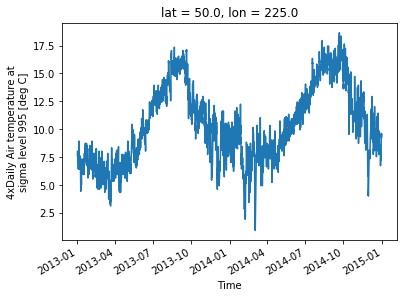

In [4]:
air1d = air.isel(lat=10, lon=10)
air1d.plot()

- **Customize the plot:**

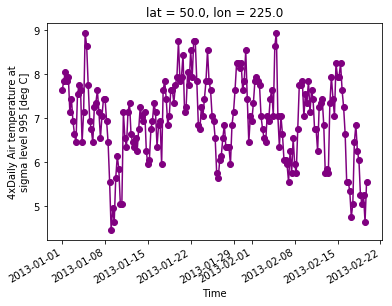

In [5]:
air1d[:200].plot.line(color='purple', marker='o')

- **Multiple plots that share an axis:**

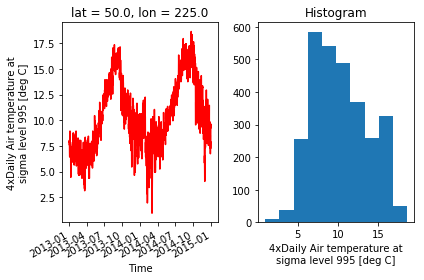

In [6]:
fig, axes = plt.subplots(ncols=2)

air1d.plot(ax=axes[0],c='r')
air1d.plot.hist(ax=axes[1])

plt.tight_layout()
plt.draw()

- **Change the Figure size:**

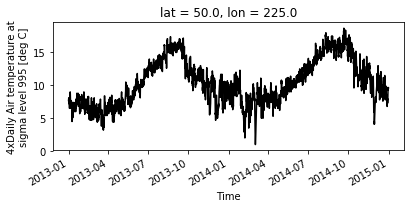

In [7]:
air1d.plot(aspect=2, size=3, color = 'k')
plt.tight_layout()

- **Plot multiple curves on the same axis:**

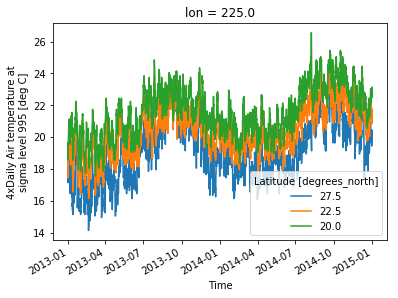

In [8]:
air.isel(lon=10, lat=[19,21,22]).plot.line(x='time')

## 2D Data

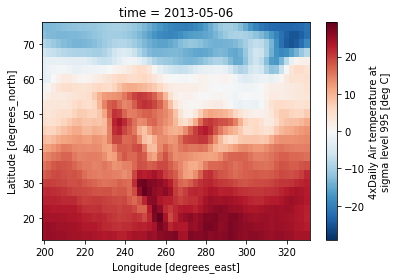

In [9]:
air2d = air.isel(time=500)

air2d.plot()

- **Manipulate the orientation of the plot using `xincrease` and `yincrease`:**

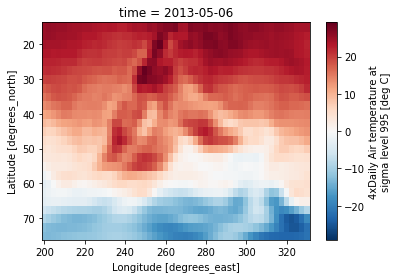

In [10]:
air2d.plot(yincrease=False)

- **Make colormaps discrete:**

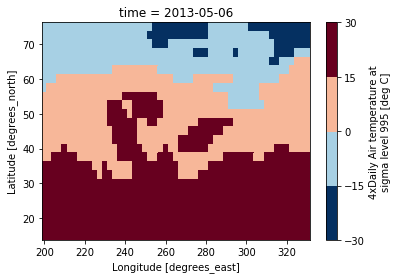

In [11]:
air2d.plot(levels=5)

- **Specify each of the discrete colors used:**

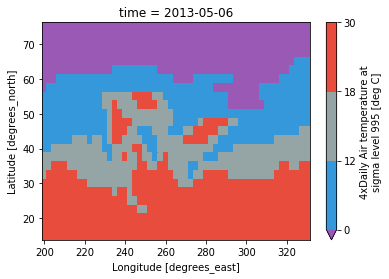

In [12]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

air2d.plot(levels=[0, 12, 18, 30], colors=flatui)

- **Use pre-defined colormaps:**

/Users/abanihi/opt/miniconda3/envs/dev/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/abanihi/opt/miniconda3/envs/dev/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/abanihi/opt/miniconda3/envs/dev/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


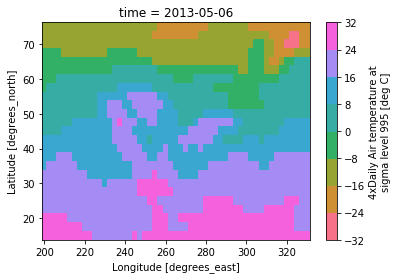

In [13]:
air2d.plot(levels=10, cmap='husl')

- **Manipulate the extent of the colorbar using `Normalize`:**

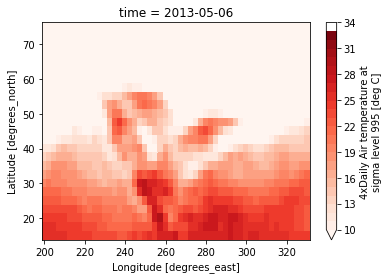

In [14]:
cmin = 10
cmax = 35
bounds = np.arange(cmin,cmax,1)
cnorm = colors.BoundaryNorm(boundaries=bounds, ncolors=len(bounds))

air2d.plot(norm=cnorm, cmap='Reds')

## Plotting Maps using Cartopy

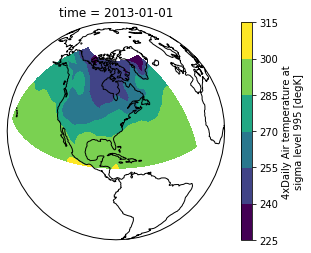

In [15]:
import cartopy.crs as ccrs

air = xr.open_dataset('data/air_temperature.nc')['air']

ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines();

In [16]:
%load_ext watermark
%watermark --iversion -g -m -v -u -d

matplotlib 3.0.2
numpy      1.16.1
xarray     0.11.1+69.gc770eec3
cartopy    0.17.0
last updated: 2019-04-02 

CPython 3.6.7
IPython 7.1.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 9a29dfaac3c5e3bf36f9d351581a72f9542ad7ed
